<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
np.expand_dims(X_train, -1).shape

(60000, 28, 28, 1)

In [7]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [8]:
K = len(np.unique(y_train))

In [9]:
K

10

In [10]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [11]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu') (i)
x = Conv2D(64, (3,3), strides=2, activation='relu') (x)
x = Conv2D(128, (3,3), strides=2, activation='relu') (x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=40)

Epoch 1/40
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5832 - accuracy: 0.7943 - val_loss: 0.4164 - val_accuracy: 0.8429
Epoch 2/40
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4186 - accuracy: 0.8457 - val_loss: 0.3957 - val_accuracy: 0.8504
Epoch 3/40
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3802 - accuracy: 0.8601 - val_loss: 0.4133 - val_accuracy: 0.8529
Epoch 4/40
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3614 - accuracy: 0.8668 - val_loss: 0.3735 - val_accuracy: 0.8642
Epoch 5/40
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3342 - accuracy: 0.8761 - val_loss: 0.3530 - val_accuracy: 0.8738
Epoch 6/40
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3280 - accuracy: 0.8775 - val_loss: 0.3541 - val_accuracy: 0.8717
Epoch 7/40
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3123 - accuracy: 0.8841 - val_loss: 0.3588 -

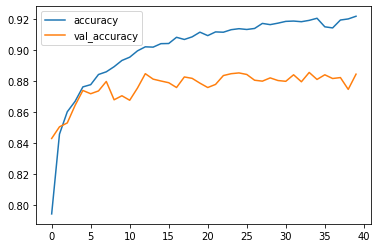

In [19]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

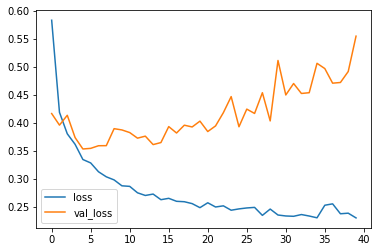

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5548 - accuracy: 0.8843


[0.5547946095466614, 0.8842999935150146]

Confusion matrix, without normalization
[[880   1  16  20   1   2  78   0   2   0]
 [  3 968   2  18   2   0   5   0   2   0]
 [ 17   0 812  12  55   0 103   1   0   0]
 [ 26   0  13 914  21   0  26   0   0   0]
 [  1   0  82  44 729   0 141   0   3   0]
 [  0   0   0   0   0 971   0  19   1   9]
 [183   1  56  29  45   1 672   1  12   0]
 [  0   0   0   0   0  10   0 971   0  19]
 [  1   0   2   4   1   5  11   4 972   0]
 [  1   0   0   0   0   3   0  42   0 954]]


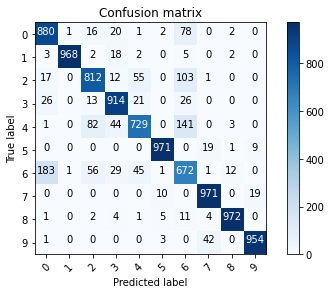

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

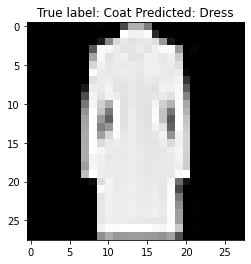

In [27]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));